# Plot dose depth dose and uncertainty

Use the output of the following simulation:
- Folder: exercices/
- Macros: ex1.mac


In [1]:
# Tell Jupyter to plot figure right in the page
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

# Module with plot capabilities
import matplotlib.pyplot as plt
plt.style.use('../../../supplimentary_material/plotting_style_sheet.txt')

# Module with scientific computing functions (matrix/vector)
import numpy as np                

# Modules with reading/write folder/file functions
import os
from pathlib import Path
from glob import glob
from scipy.optimize import curve_fit 

In [2]:
dose_files = glob('../output/*Edep.txt')

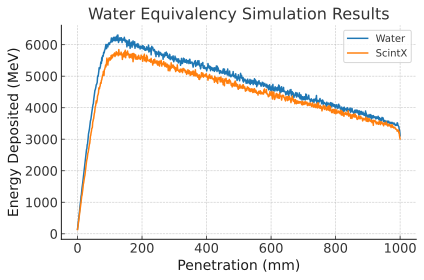

In [5]:
fig = plt.figure(facecolor='white', tight_layout=True)
for edep_file in dose_files:
    edep_values = np.loadtxt(edep_file) # This will actually skip the lines begining with #
    material, *rest_of_name = edep_file.split('_')
    x_values = np.linspace(start=0, stop=len(edep_values), num=len(edep_values))
    
    plt.plot(x_values, edep_values, linewidth=1.5, label=os.path.basename(material))
    
    plt.legend()
    plt.xlabel('Penetration (mm)')
    plt.ylabel('Energy Deposited (MeV)')
    plt.title('Water Equivalency Simulation Results')
    
plt.savefig('../../../figures/water_equivalency/ScintX_Water_comparison.svg')